# End-to-end object detection and tracking using Point Pillars and Simple Track

### Using the PointPillars pretrained model on the KITTI test dataset:

In [ ]:
# run PointPillars on KITTI dataset

%cd ~/point-cloud-object-tracking/OpenPCDet/tools
!python demo.py \
    --cfg_file cfgs/kitti_models/pointpillar.yaml \
    --ckpt ~/pre-trained-models/pointpillars-kitty.pth \
    --data_path ~/datasets/kitti/testing/velodyne  \


: 

#### PointPillar KITTI Detections

In [ ]:
%%bash
cd ~/point-cloud-object-tracking/OpenPCDet/tools
CKPT="$HOME/pre-trained-models/pointpillars-kitty.pth"
CONFIG_FILE="./cfgs/kitti_models/pointpillar.yaml"
BATCH_SIZE=32
python test.py --cfg_file "$CONFIG_FILE" --batch_size "$BATCH_SIZE"  --ckpt "$CKPT" --cuda_idx 1

### Using the PointPillars-multihead pretrained model on the nuScenes test dataset:

In [5]:
# run PointPillars-mutlihead on nuScenes dataset

%cd ~/point-cloud-object-tracking/SimpleTrack/tools
!python demo.py \
    --name demo \
    --det_name cp \
    --obj_type vehicle \
    --config_path ../configs/waymo_configs/vc_kf_giou.yaml \
    --data_folder ./demo_data \
    --visualize


/home/cv08f23/point-cloud-object-tracking/SimpleTrack/tools
segment-10203656353524179475_7625_000_7645_000_with_camera_labels.npz
START TYPE vehicle SEQ 1 / 1
TYPE [1] SEQ 1 Frame 1 / 198
[<mot_3d.data_protos.bbox.BBox object at 0x7f72b3dbff10>, <mot_3d.data_protos.bbox.BBox object at 0x7f72b3dbfeb0>, <mot_3d.data_protos.bbox.BBox object at 0x7f72b3dbff70>, <mot_3d.data_protos.bbox.BBox object at 0x7f72b3dbffd0>, <mot_3d.data_protos.bbox.BBox object at 0x7f72a85b0850>, <mot_3d.data_protos.bbox.BBox object at 0x7f72a85b0760>, <mot_3d.data_protos.bbox.BBox object at 0x7f72a85b0700>, <mot_3d.data_protos.bbox.BBox object at 0x7f72a85b0820>, <mot_3d.data_protos.bbox.BBox object at 0x7f72a85b07f0>, <mot_3d.data_protos.bbox.BBox object at 0x7f72a85b07c0>, <mot_3d.data_protos.bbox.BBox object at 0x7f72a85b06d0>, <mot_3d.data_protos.bbox.BBox object at 0x7f72a85b0880>, <mot_3d.data_protos.bbox.BBox object at 0x7f72a85b0280>, <mot_3d.data_protos.bbox.BBox object at 0x7f72a85b0370>, <mot_3d.data_

/home/cv08f23


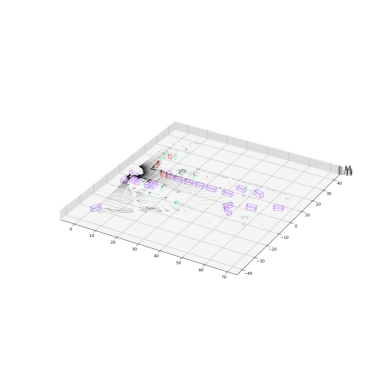

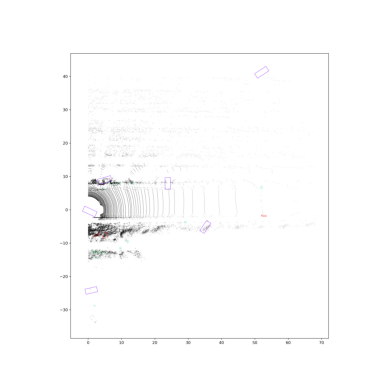

In [8]:
# Visualize samples from object detection
%cd

from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt


folder_path = "/home/cv08f23/results/kitti/point-pillars"
image_list = os.listdir(folder_path)[:2] # Get the first 5 images from the folder
for image_name in image_list:
    image_path = os.path.join(folder_path, image_name)
    image = Image.open(image_path)
    img_array = np.array(image)
    # display the image inline in the notebook
    plt.imshow(img_array)
    plt.axis("off")
    plt.show()


### Using CenterPoint pretrained model on the nuScenes test dataset:

In [ ]:
%%bash
cd ~/point-cloud-object-tracking/OpenPCDet/tools
CKPT="$HOME/pre-trained-models/centerpoint-voxel01-nuscenes.pth"
CONFIG_FILE="./cfgs/nuscenes_models/cbgs_voxel01_res3d_centerpoint.yaml"
CONFIG_FILE="./cfgs/nuscenes_models/cbgs_voxel01_res3d_centerpoint_test.yaml"
BATCH_SIZE=32
python test.py --cfg_file "$CONFIG_FILE" --batch_size "$BATCH_SIZE"  --ckpt "$CKPT"


### Using Trained PointPillars on nuScenes Validation Datasest

In [ ]:
%%bash
cd ~/point-cloud-object-tracking/OpenPCDet/tools
CKPT="$HOME/point-cloud-object-tracking/OpenPCDet/output/nuscenes_models/cbgs_pointpillar/default/ckpt/checkpoint_epoch_40.pth"
CONFIG_FILE="./cfgs/nuscenes_models/cbgs_pointpillar.yaml"
BATCH_SIZE=16
python test.py --cfg_file "$CONFIG_FILE" --batch_size "$BATCH_SIZE"  --ckpt "$CKPT"

## SimpleTrack Preprocessing

In [ ]:
%%bash
cd ~/point-cloud-object-tracking/SimpleTrack/preprocessing/nuscenes_data

# RAW_DATA_FOLDER=~/datasets/nuScenes/v1.0-trainval/
RAW_DATA_FOLDER=~/datasets/nuScenes/v1.0-test/

# DATA_DIR_2HZ=~/datasets/simpletrack/preprocessing/nuscenes_data/2hz
# DATA_DIR_20HZ=~/datasets/simpletrack/preprocessing/nuscenes_data/20hz
DATA_DIR_2HZ=~/datasets/simpletrack/preprocessing/nuscenes_test/2hz
DATA_DIR_20HZ=~/datasets/simpletrack/preprocessing/nuscenes_test/20hz

bash nuscenes_preprocess.sh "$RAW_DATA_FOLDER" "$DATA_DIR_2HZ" "$DATA_DIR_20HZ" "v1.0-test"

In [15]:
import numpy as np
from pprint import pprint as pp
# data_path = "/home/cv08f23/results/kitti/point-pillars/test.npz"
data_path = "/home/cv08f23/datasets/simpletrack/preprocessing/nuscenes_test/2hz/pc/raw_pc/scene-0078.npz"
data = np.load(data_path, allow_pickle=True)
# Set the print options
np.set_printoptions(precision=2, suppress=True)
# for key in data:
#     print(f"Key: {key}")
#     print("Array:")
#     print(data[key])
#     print()

print(len(data.keys()))

# 3D visualization

# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': '3d'})
# ax.scatter(data['0'][:, 0], data['0'][:, 1], data['0'][:, 2], s=0.1)
# # equal axis
# ax.set_aspect("equal", adjustable="box")

39


## SimpleTrack Motion Model

In [16]:
%%bash

cd ~/point-cloud-object-tracking/SimpleTrack/preprocessing/nuscenes_data

RAW_DATA_DIR=~/datasets/nuScenes/v1.0-trainval/
# RAW_DATA_DIR=~/datasets/nuScenes/v1.0-test/

DATA_DIR_2HZ=~/datasets/simpletrack/preprocessing/nuscenes_data/2hz
DATA_DIR_20HZ=~/datasets/simpletrack/preprocessing/nuscenes_data/20hz
# DATA_DIR_2HZ=~/datasets/simpletrack/preprocessing/nuscenes_test/2hz
# DATA_DIR_20HZ=~/datasets/simpletrack/preprocessing/nuscenes_test/20hz

MODE=2hz # 20hz | 2hz
if [ "$mode" = "20hz" ]; then
    DATA_DIR="$DATA_DIR_20HZ"
else
    DATA_DIR="$DATA_DIR_2HZ"
fi

DET_NAME="cp_0.06"
# FILE_PATH=~/point-cloud-object-tracking/OpenPCDet/output/cfgs/nuscenes_models/cbgs_voxel01_res3d_centerpoint/default/eval/epoch_01/val/default/final_result/data/results_nusc.json
# FILE_PATH=~/point-cloud-object-tracking/OpenPCDet/output/cfgs/nuscenes_models/cbgs_voxel01_res3d_centerpoint/default/eval/epoch_01/test/default/final_result/data/results_nusc.json
FILE_PATH=~/point-cloud-object-tracking/OpenPCDet/output/nuscenes_models/cbgs_voxel_res3d_centerpoint_custom/default/eval/eval_with_train/epoch_30/val/final_result/data/results_nusc.json
echo "MODE: $MODE"

python detection.py \
    --raw_data_folder "$RAW_DATA_DIR" \
    --data_folder "$DATA_DIR" \
    --det_name "$DET_NAME" \
    --file_path "$FILE_PATH" \
    --mode "$MODE" \
    --velo

MODE: 2hz
LOADING RAW FILE
PROCESSING...


100%|██████████| 6008/6008 [00:01<00:00, 4716.27it/s]


SAVING...


  0%|          | 0/150 [00:00<?, ?it/s]/home/cv08f23/.conda/envs/pcot/lib/python3.10/site-packages/numpy/lib/npyio.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)
100%|██████████| 150/150 [00:06<00:00, 23.23it/s]


In [18]:
import numpy as np
from pprint import pprint as pp

data_path = "/home/cv08f23/datasets/simpletrack/preprocessing/nuscenes_test/2hz/detection/cp/dets/scene-0077.npz"
data = np.load(data_path, allow_pickle=True)

# Set the print options
np.set_printoptions(precision=2, suppress=True)

for key in data:
    print(f"Key: {key}")
    # print("Array:")
    # pp(data[key])
    # print()

# [x, y, z, w, l, h, qx, qy, qz, qw, score]
frame_idx = 1
print()
print(np.array(data['bboxes'][0])[frame_idx])
print(np.array(data['types'][0])[frame_idx])
print(np.array(data['velos'][0])[frame_idx])

Key: bboxes
Key: types
Key: velos

[2399.14  787.06    1.31    2.51    7.03    3.     -0.72   -0.      0.03
   -0.69    0.73]
car
[0.01 1.52]


## SimpleTrack Tracking

In [10]:
%%bash

cd ~/point-cloud-object-tracking/SimpleTrack/tools/

DET_NAME="cp_0.06"

RESULT_FOLDER="$HOME/datasets/simpletrack/tracking/nuscenes_data/$DET_NAME/"
# RESULT_FOLDER=~/datasets/simpletrack/tracking/nuscenes_test/

CONFIG_PATH=~/point-cloud-object-tracking/SimpleTrack/configs/nu_configs/giou.yaml

DATA_DIR_2HZ=~/datasets/simpletrack/preprocessing/nuscenes_data/2hz
DATA_DIR_20HZ=~/datasets/simpletrack/preprocessing/nuscenes_data/20hz
# DATA_DIR_2HZ=~/datasets/simpletrack/preprocessing/nuscenes_test/2hz
# DATA_DIR_20HZ=~/datasets/simpletrack/preprocessing/nuscenes_test/20hz

MODE=2hz # 20hz | 2hz
if [ "$mode" = "20hz" ]; then
    DATA_DIR="$DATA_DIR_20HZ"
else
    DATA_DIR="$DATA_DIR_2HZ"
fi

python main_nuscenes.py \
    --det_name "$DET_NAME" \
    --config_path "$CONFIG_PATH" \
    --result_folder "$RESULT_FOLDER" \
    --data_folder "$DATA_DIR" \
    --visualize true 

TYPE car SEQ 19 Frame 31 / 39
START TYPE car SEQ 7 / 150
TYPE car SEQ 6 Frame 1 / 40


usage: main_nuscenes.py [-h] [--name NAME] [--det_name DET_NAME]
                        [--process PROCESS] [--visualize]
                        [--start_frame START_FRAME] [--obj_types OBJ_TYPES]
                        [--config_path CONFIG_PATH]
                        [--result_folder RESULT_FOLDER]
                        [--data_folder DATA_FOLDER]
main_nuscenes.py: error: unrecognized arguments: True


CalledProcessError: Command 'b'\ncd ~/point-cloud-object-tracking/SimpleTrack/tools/\n\nDET_NAME="cp_0.06"\n\nRESULT_FOLDER="$HOME/datasets/simpletrack/tracking/nuscenes_data/$DET_NAME/"\n# RESULT_FOLDER=~/datasets/simpletrack/tracking/nuscenes_test/\n\nCONFIG_PATH=~/point-cloud-object-tracking/SimpleTrack/configs/nu_configs/giou.yaml\n\nDATA_DIR_2HZ=~/datasets/simpletrack/preprocessing/nuscenes_data/2hz\nDATA_DIR_20HZ=~/datasets/simpletrack/preprocessing/nuscenes_data/20hz\n# DATA_DIR_2HZ=~/datasets/simpletrack/preprocessing/nuscenes_test/2hz\n# DATA_DIR_20HZ=~/datasets/simpletrack/preprocessing/nuscenes_test/20hz\n\nMODE=2hz # 20hz | 2hz\nif [ "$mode" = "20hz" ]; then\n    DATA_DIR="$DATA_DIR_20HZ"\nelse\n    DATA_DIR="$DATA_DIR_2HZ"\nfi\n\npython main_nuscenes.py \\\n    --det_name "$DET_NAME" \\\n    --config_path "$CONFIG_PATH" \\\n    --result_folder "$RESULT_FOLDER" \\\n    --data_folder "$DATA_DIR" \\\n    --visualize True \n'' returned non-zero exit status 2.

TYPE car SEQ 6 Frame 11 / 40
TYPE car SEQ 17 Frame 11 / 39
START TYPE car SEQ 21 / 150
TYPE car SEQ 20 Frame 1 / 40
TYPE car SEQ 6 Frame 21 / 40
TYPE car SEQ 20 Frame 11 / 40
TYPE car SEQ 20 Frame 21 / 40
TYPE car SEQ 17 Frame 21 / 39
TYPE car SEQ 6 Frame 31 / 40
TYPE car SEQ 20 Frame 31 / 40
START TYPE car SEQ 22 / 150
TYPE car SEQ 21 Frame 1 / 40
TYPE car SEQ 17 Frame 31 / 39
START TYPE car SEQ 8 / 150
TYPE car SEQ 7 Frame 1 / 40
TYPE car SEQ 21 Frame 11 / 40
START TYPE car SEQ 19 / 150
TYPE car SEQ 18 Frame 1 / 39
TYPE car SEQ 21 Frame 21 / 40
TYPE car SEQ 7 Frame 11 / 40
TYPE car SEQ 25 Frame 31 / 39
TYPE car SEQ 18 Frame 11 / 39
TYPE car SEQ 18 Frame 21 / 39
TYPE car SEQ 21 Frame 31 / 40
TYPE car SEQ 7 Frame 21 / 40
TYPE car SEQ 18 Frame 31 / 39
START TYPE car SEQ 20 / 150
TYPE car SEQ 19 Frame 1 / 39
TYPE car SEQ 7 Frame 31 / 40
START TYPE car SEQ 23 / 150
TYPE car SEQ 22 Frame 1 / 40
START TYPE car SEQ 9 / 150
TYPE car SEQ 8 Frame 1 / 40
TYPE car SEQ 22 Frame 11 / 40
TYPE car SE

In [22]:
import numpy as np

data_path = "/home/cv08f23/datasets/simpletrack/tracking/nuscenes_test/debug/summary/truck/scene-0077.npz"
data = np.load(data_path, allow_pickle=True)

# Set the print options
np.set_printoptions(precision=2, suppress=True)

for key in data:
    print(f"Key: {key}")
    # print("Array:")
    # pp(data[key])
    # print()

frame_idx = 1
tracklet_idx = 1

# <scene>_<id>
# [<x>, <y>, <z>, <o>, <l>, <w>, <h>, <score>]
# <state>_<recent-state>_<time-since-last-update>
# <type>

print()
print(np.array(data['ids'][frame_idx])[tracklet_idx])
print(np.array(data['bboxes'][frame_idx])[tracklet_idx])
print(np.array(data['states'][frame_idx])[tracklet_idx])
print(np.array(data['types'][frame_idx])[tracklet_idx])

Key: ids
Key: bboxes
Key: states
Key: types

0_1
[2405.23  786.28    0.8    -1.58    5.59    2.18    2.01    0.19]
alive_1_0
truck


## SimpleTrack Results

In [1]:
%%bash

cd ~/point-cloud-object-tracking/SimpleTrack/tools/

DET_NAME="cp_0.06"

RESULT_FOLDER="$HOME/datasets/simpletrack/tracking/nuscenes_data/$DET_NAME/"
# RESULT_FOLDER=~/datasets/simpletrack/tracking/nuscenes_test/

DATA_DIR_2HZ=~/datasets/simpletrack/preprocessing/nuscenes_data/2hz
DATA_DIR_20HZ=~/datasets/simpletrack/preprocessing/nuscenes_data/20hz
# DATA_DIR_2HZ=~/datasets/simpletrack/preprocessing/nuscenes_test/2hz
# DATA_DIR_20HZ=~/datasets/simpletrack/preprocessing/nuscenes_test/20hz

MODE=2hz # 20hz | 2hz
if [ "$mode" = "20hz" ]; then
    DATA_DIR="$DATA_DIR_20HZ"
else
    DATA_DIR="$DATA_DIR_2HZ"
fi

python nuscenes_result_creation.py \
    --result_folder "$RESULT_FOLDER" \
    --data_folder "$DATA_DIR"

CONVERTING car


100%|████████████████████████████████████████| 150/150 [00:19<00:00,  7.53it/s]


CONVERTING bus


100%|████████████████████████████████████████| 150/150 [00:01<00:00, 82.51it/s]


CONVERTING trailer


100%|████████████████████████████████████████| 150/150 [00:03<00:00, 45.30it/s]


CONVERTING truck


100%|████████████████████████████████████████| 150/150 [00:08<00:00, 18.72it/s]


CONVERTING pedestrian


100%|████████████████████████████████████████| 150/150 [00:17<00:00,  8.39it/s]


CONVERTING bicycle


100%|████████████████████████████████████████| 150/150 [00:14<00:00, 10.35it/s]


CONVERTING motorcycle


100%|████████████████████████████████████████| 150/150 [00:08<00:00, 17.50it/s]


In [ ]:
%%bash

SET=val # train | val | test
# CLASS=car # bicycle | bus | car | motorcycle | pedestrian | trailer | truck

if [ "$SET" = "test" ]; then
       VERSION="v1.0-test"
       RAW_DATA_FOLDER=~/datasets/nuScenes/v1.0-test/
       TRACKING_OUTPUT_PARENT_DIR="nuscenes_test"
else
       VERSION="v1.0-trainval"
       RAW_DATA_FOLDER=~/datasets/nuScenes/v1.0-trainval/
       TRACKING_OUTPUT_PARENT_DIR="nuscenes_data"
fi

DET_NAME="cp_0.06"

RESULTS_DATA_DIR="~/datasets/simpletrack/tracking/$TRACKING_OUTPUT_PARENT_DIR/$DET_NAME/debug/results/merged_output.json"
echo "$RESULTS_DATA_DIR"
OUTPUT_DIR="~/datasets/simpletrack/tracking/$TRACKING_OUTPUT_PARENT_DIR/$DET_NAME/debug/eval"

python ~/.conda/envs/pcot_3.9/lib/python3.9/site-packages/nuscenes/eval/tracking/evaluate.py \
       "$RESULTS_DATA_DIR" \
       --version "$VERSION" \
       --eval_set "$SET" \
       --dataroot "$RAW_DATA_FOLDER" \
       --output_dir "$OUTPUT_DIR"
